<h2> Data organization <h2>

In [1]:
!wget http://andrewjanowczyk.com/wp-static/tubule.tgz

--2024-03-28 18:20:17--  http://andrewjanowczyk.com/wp-static/tubule.tgz
Resolving andrewjanowczyk.com (andrewjanowczyk.com)... 129.22.181.85
Connecting to andrewjanowczyk.com (andrewjanowczyk.com)|129.22.181.85|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93888009 (90M) [application/x-gzip]
Saving to: ‘tubule.tgz’

tubule.tgz          100%[===================>]  89.54M  1.02MB/s    in 43s     

2024-03-28 18:21:00 (2.10 MB/s) - ‘tubule.tgz’ saved [93888009/93888009]



In [2]:
mkdir tubule

In [3]:
!tar -xvzf tubule.tgz -C tubule

09-1339-01-1_anno.bmp
09-1339-01-1.bmp
09-1339-01-2_anno.bmp
09-1339-01-2.bmp
09-1339-01-3_anno.bmp
09-1339-01-3.bmp
09-1339-01-4_anno.bmp
09-1339-01-4.bmp
09-1339-02-1_anno.bmp
09-1339-02-1.bmp
09-1339-02-2_anno.bmp
09-1339-02-2.bmp
09-1339-02-3_anno.bmp
09-1339-02-3.bmp
09-1339-02-4_anno.bmp
09-1339-02-4.bmp
09-1339-05-1_anno.bmp
09-1339-05-1.bmp
09-1339-05-2_anno.bmp
09-1339-05-2.bmp
09-1339-05-3_anno.bmp
09-1339-05-3.bmp
09-1339-05-4_anno.bmp
09-1339-05-4.bmp
09-1646-01-1_anno.bmp
09-1646-01-1.bmp
09-1646-01-2_anno.bmp
09-1646-01-2.bmp
09-1646-01-3_anno.bmp
09-1646-01-3.bmp
09-1646-01-4_anno.bmp
09-1646-01-4.bmp
09-1646-02-1_anno.bmp
09-1646-02-1.bmp
09-1646-02-2_anno.bmp
09-1646-02-2.bmp
09-1646-02-3_anno.bmp
09-1646-02-3.bmp
09-1646-02-4_anno.bmp
09-1646-02-4.bmp
09-1646-03-1_anno.bmp
09-1646-03-1.bmp
09-1646-03-2_anno.bmp
09-1646-03-2.bmp
09-1646-03-3_anno.bmp
09-1646-03-3.bmp
09-1646-03-4_anno.bmp
09-1646-03-4.bmp
09-1646-05-1_anno.bmp
09-1646-05-1.bmp
09-1646-05-2_anno.bmp
09-

In [7]:
mkdir data data/images data/anno_masks

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/images’: File exists
mkdir: cannot create directory ‘data/anno_masks’: File exists


In [8]:
mkdir data/images/patches_i data/anno_masks/patches_m

mkdir: cannot create directory ‘data/images/patches_i’: File exists
mkdir: cannot create directory ‘data/anno_masks/patches_m’: File exists


In [10]:
mv tubule/*_anno.bmp data/anno_masks/

In [11]:
mv tubule/*.bmp data/images

<h2> Patch Extraction <h2>

In [12]:
# Credits: ICIAR2018 by ImagingLabs
class PatchExtractor:
    def __init__(self, img, patch_size, stride):
        '''
        :param img: :py:class:`~PIL.Image.Image`
        :param patch_size: integer, size of the patch
        :param stride: integer, size of the stride
        '''
        self.img = img
        self.size = patch_size
        self.stride = stride

    def extract_patches(self):
        """
        extracts all patches from an image
        :returns: A list of :py:class:`~PIL.Image.Image` objects.
        """
        wp, hp = self.shape()
        return [self.extract_patch((w, h)) for h in range(hp) for w in range(wp)]

    def extract_patch(self, patch):
        """
        extracts a patch from an input image
        :param patch: a tuple
        :rtype: :py:class:`~PIL.Image.Image`
        :returns: An :py:class:`~PIL.Image.Image` object.
        """
        return self.img.crop((
            patch[0] * self.stride,  # left
            patch[1] * self.stride,  # up
            patch[0] * self.stride + self.size,  # right
            patch[1] * self.stride + self.size  # down
        ))

    def shape(self):
        wp = int((self.img.width - self.size) / self.stride + 1)
        hp = int((self.img.height - self.size) / self.stride + 1)
        return wp, hp

In [13]:
import glob
from PIL import Image

PATCH_SIZE = 256

# This is the folder you'll find after extracting the dataset.
train_folder = './data/images'
labels = glob.glob(train_folder +  '/*.bmp')
labels.sort()

In [14]:
for item in labels:
  try:
    with Image.open(item) as img:
      extractor = PatchExtractor(img=img, patch_size=PATCH_SIZE, stride=256)
      patches = extractor.extract_patches()
      count = 0
      for p in patches:
        count += 1
        p.save('./data/images/patches_i/' + str(count) + '_' + item.split('/')[-1][:-3] + 'bmp')
  except Exception as error:
    print('error with', item, error)


In [18]:
labels = glob.glob('./data/anno_masks/*.bmp')
labels.sort()

In [19]:
for item in labels:
  try:
    with Image.open(item) as img:
      extractor = PatchExtractor(img=img, patch_size=PATCH_SIZE, stride=256)
      patches = extractor.extract_patches()
      count = 0
      for p in patches:
        count += 1
        # print('./train/' + value + '/' + str(count) + '_' + key.split('/')[-1])
        p.save('./data/anno_masks/patches_m/' + str(count) + '_' + item.split('/')[-1])
  except Exception as error:
    print('error with', item, error)

In [15]:
images = [item for item in glob.glob('data/images/patches_i/*')]
# masks = [item for item in glob.glob('data/anno_masks/patches_m/*')]


In [20]:
masks = [item for item in glob.glob('data/anno_masks/patches_m/*')]

In [21]:
len(images), len(masks)


(486, 486)

In [22]:
images.sort()
masks.sort()


In [23]:
from PIL import Image
import numpy as np


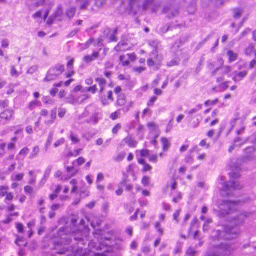

In [26]:
Image.open('/content/data/images/patches_i/1_09-1339-01-1.bmp')


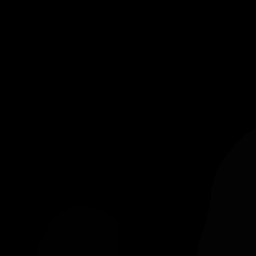

In [37]:
Image.open('/content/data/anno_masks/patches_m/1_09-1339-01-1_anno.bmp')
# Faintly visible needs thresholding for clearer output

In [44]:
import sys
import os
from keras.utils import Progbar
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
# Function read train images and mask return as nump array
def read_train_data(IMG_WIDTH=256,IMG_HEIGHT=256,IMG_CHANNELS=3):
    X_train = np.zeros((len(images), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
    Y_train = np.zeros((len(masks), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    print('Getting and resizing train images and masks ... ')
    sys.stdout.flush()
    if os.path.isfile("train_img.npy") and os.path.isfile("train_mask.npy"):
        print("Train file loaded from memory")
        X_train = np.load("train_img.npy")
        Y_train = np.load("train_mask.npy")
        return X_train,Y_train
    a = Progbar(len(images))
    for n, p in enumerate(zip(images, masks)):
        path = p[0]
        img = imread(path)[:,:,:IMG_CHANNELS]
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
        X_train[n] = img
        mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
        mask_ = imread(p[1])
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',
                                    preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
        Y_train[n] = mask
        a.update(n)
    np.save("train_img",X_train)
    np.save("train_mask",Y_train)
    return X_train,Y_train

In [45]:
train_img,train_mask = read_train_data()

Getting and resizing train images and masks ... 
484/486 [============================>.] - ETA: 0s

<h2> Model Training <h2>

In [46]:
# Metric function
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Loss funtion
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [7]:
import os
import random
import sys
import warnings
import numpy as np
import pandas as pd
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from keras.utils import Progbar

from keras.models import Model, load_model
from keras.layers import Input
# from keras.layers.core import Dropout, Lambda
from keras.layers import Dense, Activation, Dropout, Reshape, Permute, Lambda
from keras.layers import Conv2D, Conv2DTranspose,Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import concatenate
from keras import backend as K

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')

# Setting seed for reproducability
seed = 42
random.seed = seed
np.random.seed = seed
smooth = 1.
epochs = 50

In [52]:
def get_unet(IMG_WIDTH=256,IMG_HEIGHT=256,IMG_CHANNELS=3):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

    c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (inputs)
    c1 = Dropout(0.1) (c1)
    c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
    p1 = MaxPooling2D((2, 2)) (c1)
    c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
    c2 = Dropout(0.1) (c2)
    c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
    p2 = MaxPooling2D((2, 2)) (c2)

    c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
    c3 = Dropout(0.2) (c3)
    c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
    p3 = MaxPooling2D((2, 2)) (c3)

    c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
    c4 = Dropout(0.2) (c4)
    c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

    c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
    c5 = Dropout(0.3) (c5)
    c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
    c6 = Dropout(0.2) (c6)
    c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
    c7 = Dropout(0.2) (c7)
    c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
    c8 = Dropout(0.1) (c8)
    c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
    c9 = Dropout(0.1) (c9)
    c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam',loss='binary_crossentropy', metrics=[dice_coef])
    return model

In [53]:
u_net = get_unet()
u_net.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [ ]:
print("\nTraining...")
u_net.fit(train_img,train_mask,batch_size=96,epochs=15)

In [3]:
from PIL import Image

In [4]:
im = Image.open('/content/data/images/patches_i/1_09-1339-01-2.bmp')

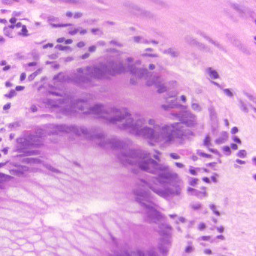

In [5]:
Image.open('/content/data/images/patches_i/1_09-1339-01-2.bmp')

In [ ]:
px = np.array(im)/255
px = px.reshape((1,256,256,3))
e = u_net.predict(px).reshape((256,256))
# Image.fromarray((e*255).astype('uint8'))

<h2> Segmentation Model Output <h2>

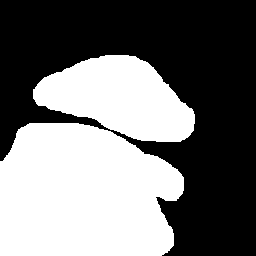

In [22]:
threshold = 0.0  # Adjust this threshold as needed
bw_image = np.where(e > threshold, 255, 0)

# Convert to uint8 and create a PIL Image
bw_image = bw_image.astype('uint8')
Image.fromarray(bw_image)


<h2> Actual Mask <h2>

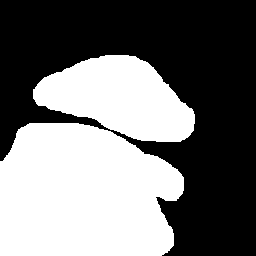

In [137]:
from IPython.display import display

im1=Image.open('/content/data/anno_masks/patches_m/1_09-1339-01-2_anno.bmp')

im1_gray = im1.convert('L')

threshold = 0.0
bw_image = im1_gray.point(lambda p: p > threshold and 255)

display(bw_image)

In [157]:
u_net.save('tubule_seg_model.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<h2> Conversion <h2>

In [ ]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format=keras ./model.hdf5 ./tfjs_model